In [1]:
import csv 
import sys
import networkx as nx
import matplotlib.pyplot as plt
import json

In [2]:
# Tests to see if we are running in the Google Colaboratory environment
# If so, use an https URL to access the data.  Otherwise, load via the file path
try:
  import google.colab
  data_file_prefix = "https://raw.githubusercontent.com/slankas/DataScienceNotebooks/master/Networking/"
  import plotly.io as pio
  pio.renderers.default = 'colab'
except:
  data_file_prefix = ""

In [3]:
G = nx.Graph()

with open(data_file_prefix+"data/transportEdges.csv", 'r' ) as theFile:
    reader = csv.DictReader(theFile)
    for line in reader:
        G.add_edge(line["src"],line["dst"],weight = int(line["cost"]))
        G.add_edge(line["dst"],line["src"],weight = int(line["cost"]))

In [4]:
def displayGraph(G):
    plt.figure(num=None, figsize=(10, 10), dpi=80)
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 100]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 100]
    pos = nx.spring_layout(G)  # positions for all nodes

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=1-0)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=3, alpha=0.5)
    nx.draw_networkx_edges(G, pos, edgelist=esmall, width=1, alpha=0.5, edge_color="b", style="dashed")
    nx.draw_networkx_edge_labels(G, pos=pos, alpha=0.25, edge_labels = nx.get_edge_attributes(G,'weight'))
    
    #labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

    plt.axis("off")
    plt.show()

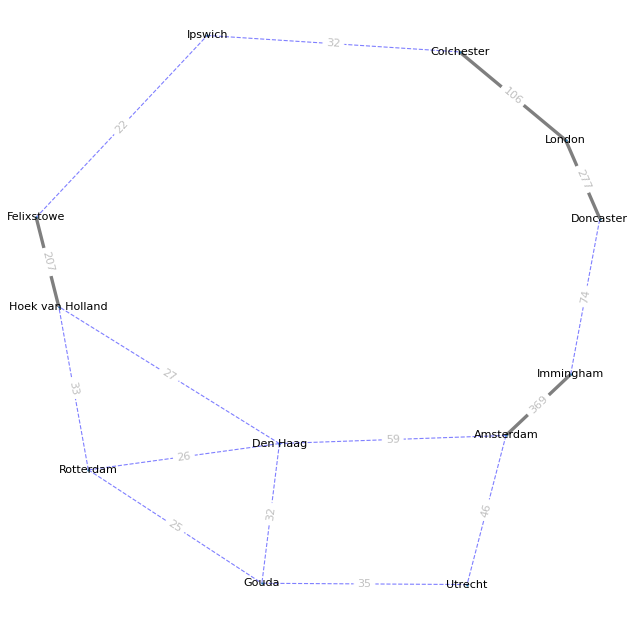

In [5]:
 displayGraph(G)

In [6]:
print ("Breadth-first traversal starting at 'Den Haag' ")
list(nx.bfs_edges(G, 'Den Haag'))


Breadth-first traversal starting at 'Den Haag' 


[('Den Haag', 'Amsterdam'),
 ('Den Haag', 'Rotterdam'),
 ('Den Haag', 'Hoek van Holland'),
 ('Den Haag', 'Gouda'),
 ('Amsterdam', 'Utrecht'),
 ('Amsterdam', 'Immingham'),
 ('Hoek van Holland', 'Felixstowe'),
 ('Immingham', 'Doncaster'),
 ('Felixstowe', 'Ipswich'),
 ('Doncaster', 'London'),
 ('Ipswich', 'Colchester')]

In [7]:
print ("Depth-first traversal starting at 'Den Haag' ")
list(nx.dfs_edges(G, 'Den Haag'))

Depth-first traversal starting at 'Den Haag' 


[('Den Haag', 'Amsterdam'),
 ('Amsterdam', 'Utrecht'),
 ('Utrecht', 'Gouda'),
 ('Gouda', 'Rotterdam'),
 ('Rotterdam', 'Hoek van Holland'),
 ('Hoek van Holland', 'Felixstowe'),
 ('Felixstowe', 'Ipswich'),
 ('Ipswich', 'Colchester'),
 ('Colchester', 'London'),
 ('London', 'Doncaster'),
 ('Doncaster', 'Immingham')]

In [8]:
print ("Dijkstra's Shortest Path")
list(nx.dijkstra_path(G, 'Amsterdam', 'London','weight'))

Dijkstra's Shortest Path


['Amsterdam',
 'Den Haag',
 'Hoek van Holland',
 'Felixstowe',
 'Ipswich',
 'Colchester',
 'London']

In [9]:
length, path = nx.single_source_bellman_ford(G, 'Amsterdam')
print (length)
print (json.dumps(path, indent=4))

{'Amsterdam': 0, 'Utrecht': 46, 'Den Haag': 59, 'Immingham': 369, 'Gouda': 81, 'Rotterdam': 85, 'Hoek van Holland': 86, 'Doncaster': 443, 'Felixstowe': 293, 'London': 453, 'Ipswich': 315, 'Colchester': 347}
{
    "Amsterdam": [
        "Amsterdam"
    ],
    "Utrecht": [
        "Amsterdam",
        "Utrecht"
    ],
    "Den Haag": [
        "Amsterdam",
        "Den Haag"
    ],
    "Immingham": [
        "Amsterdam",
        "Immingham"
    ],
    "Gouda": [
        "Amsterdam",
        "Utrecht",
        "Gouda"
    ],
    "Rotterdam": [
        "Amsterdam",
        "Den Haag",
        "Rotterdam"
    ],
    "Hoek van Holland": [
        "Amsterdam",
        "Den Haag",
        "Hoek van Holland"
    ],
    "Doncaster": [
        "Amsterdam",
        "Immingham",
        "Doncaster"
    ],
    "Felixstowe": [
        "Amsterdam",
        "Den Haag",
        "Hoek van Holland",
        "Felixstowe"
    ],
    "London": [
        "Amsterdam",
        "Den Haag",
        "Hoek van Holl

In [10]:
distance = nx.floyd_warshall(G)
print (json.dumps(distance, indent=4))

{
    "Amsterdam": {
        "Amsterdam": 0,
        "Utrecht": 46,
        "Den Haag": 59,
        "Immingham": 369,
        "Rotterdam": 85,
        "Doncaster": 443,
        "London": 453,
        "Hoek van Holland": 86,
        "Felixstowe": 293,
        "Ipswich": 315,
        "Colchester": 347,
        "Gouda": 81
    },
    "Utrecht": {
        "Utrecht": 0,
        "Amsterdam": 46,
        "Gouda": 35,
        "Den Haag": 67,
        "Rotterdam": 60,
        "Immingham": 415,
        "Doncaster": 489,
        "London": 460,
        "Hoek van Holland": 93,
        "Felixstowe": 300,
        "Ipswich": 322,
        "Colchester": 354
    },
    "Den Haag": {
        "Den Haag": 0,
        "Amsterdam": 59,
        "Rotterdam": 26,
        "Hoek van Holland": 27,
        "Gouda": 32,
        "Utrecht": 67,
        "Immingham": 428,
        "Doncaster": 502,
        "London": 394,
        "Felixstowe": 234,
        "Ipswich": 256,
        "Colchester": 288
    },
    "Rotterdam": {
 

In [11]:
T = nx.minimum_spanning_tree(G,weight='weight',algorithm='prim')   # kruskal, prim, and boruvka


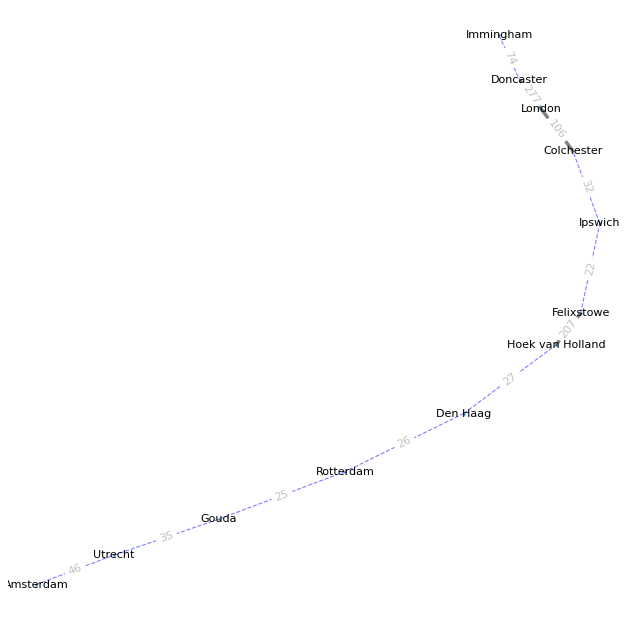

In [12]:
 displayGraph(T)

In [13]:
for line in nx.generate_edgelist(G):
    print(line)

Amsterdam Utrecht {'weight': 46}
Amsterdam Den Haag {'weight': 59}
Amsterdam Immingham {'weight': 369}
Utrecht Gouda {'weight': 35}
Den Haag Rotterdam {'weight': 26}
Den Haag Hoek van Holland {'weight': 27}
Den Haag Gouda {'weight': 32}
Rotterdam Gouda {'weight': 25}
Rotterdam Hoek van Holland {'weight': 33}
Immingham Doncaster {'weight': 74}
Doncaster London {'weight': 277}
London Colchester {'weight': 106}
Hoek van Holland Felixstowe {'weight': 207}
Felixstowe Ipswich {'weight': 22}
Ipswich Colchester {'weight': 32}
